In [2]:
# =============================================================================
# NETFLIX DATA ANALYSIS PROJECT - BASIC EDA
# Step 1: Foundation Setup
# =============================================================================

print("🎬 Starting Netflix Data Analysis Project...")

# Basic Data Handling
import pandas as pd
import numpy as np

# Basic Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Statistics
from scipy import stats
from scipy.stats import zscore

# Configuration
import warnings
warnings.filterwarnings('ignore')

# Set basic styling
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Basic libraries imported successfully!")

🎬 Starting Netflix Data Analysis Project...
✅ Basic libraries imported successfully!


In [3]:
# =============================================================================
# STEP 2: DATA LOADING & BASIC INSPECTION
# =============================================================================

print("\n" + "="*50)
print("DATA LOADING & BASIC INSPECTION")
print("="*50)

# Load the dataset
try:
    df = pd.read_csv('C:/Users/tusha/Downloads/Netflix Dataset.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File 'netflix_titles.csv' not found!")
    print("Please ensure the file is in your current directory")
    # Create sample data for demonstration
    data = {
        'show_id': ['s1', 's2', 's3', 's4', 's5'],
        'type': ['Movie', 'TV Show', 'Movie', 'TV Show', 'Movie'],
        'title': ['Movie 1', 'Show 1', 'Movie 2', 'Show 2', 'Movie 3'],
        'director': ['Director A', 'Director B', 'Director C', np.nan, 'Director E'],
        'cast': ['Actor A, Actor B', 'Actor C, Actor D', 'Actor E, Actor F', 'Actor G', 'Actor H'],
        'country': ['USA', 'UK', 'USA', 'Canada', 'India'],
        'date_added': ['January 1, 2020', 'February 1, 2020', 'March 1, 2020', 'April 1, 2020', 'May 1, 2020'],
        'release_year': [2019, 2018, 2020, 2017, 2019],
        'rating': ['PG-13', 'TV-MA', 'R', 'PG', 'TV-14'],
        'duration': ['120 min', '2 Seasons', '110 min', '3 Seasons', '130 min'],
        'listed_in': ['Dramas, Romance', 'Comedies', 'Action, Thriller', 'Documentaries', 'Horror'],
        'description': ['A thrilling drama about life', 'Funny comedy series', 'Action packed movie', 
                       'Documentary about nature', 'Horror movie with twists']
    }
    df = pd.DataFrame(data)
    print(" Using sample data for demonstration")

# Basic Dataset Information
print(f"\n DATASET SHAPE: {df.shape}")
print(f" COLUMNS: {list(df.columns)}")

# Display first few rows
print("\n FIRST 5 ROWS:")
print(df.head())

print("\n\ LAST 5 ROWS:")
print(df.tail())

# Basic Information
print("\n BASIC INFO:")
print(df.info())

print("\n STATISTICAL SUMMARY:")
print(df.describe(include='all'))

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n DUPLICATE ROWS: {duplicates}")


DATA LOADING & BASIC INSPECTION
✅ Dataset loaded successfully!

 DATASET SHAPE: (7789, 11)
 COLUMNS: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

 FIRST 5 ROWS:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \

In [4]:
# =============================================================================
# STEP 3: BASIC DATA CLEANING
# =============================================================================

print("\n" + "="*50)
print("BASIC DATA CLEANING")
print("="*50)

# Create a copy for cleaning
df_clean = df.copy()

# 1. Handle Missing Values
print("\n1. 🧹 HANDLING MISSING VALUES:")
missing_data = df_clean.isnull().sum()
print("Missing values per column:")
for col, count in missing_data.items():
    if count > 0:
        print(f"   {col}: {count} missing ({count/len(df_clean)*100:.1f}%)")

# Simple imputation for key columns (match actual column names)
df_clean['Director'].fillna('Unknown Director', inplace=True)
df_clean['Cast'].fillna('Unknown Cast', inplace=True)
df_clean['Country'].fillna('Unknown Country', inplace=True)

print("✅ Missing values handled with basic imputation")

# 2. Remove duplicates if any
duplicates = df_clean.duplicated().sum()
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"✅ Removed {duplicates} duplicate rows")
else:
    print("✅ No duplicate rows found")

# 3. Basic Feature Engineering
print("\n2. 🔧 BASIC FEATURE ENGINEERING:")

# Extract duration number (works for "93 min" and "1 Season", "3 Seasons")
df_clean['duration_num'] = (
    df_clean['Duration']
    .str.extract(r'(\d+)')
    .astype(float)
)

# Extract duration type (min or Season/Seasons)
df_clean['duration_type'] = df_clean['Duration'].str.extract(r'(min|Season[s]?)')

# Convert Release_Date to datetime
df_clean['date_added'] = pd.to_datetime(df_clean['Release_Date'], errors='coerce')

# Extract year added
df_clean['year_added'] = df_clean['date_added'].dt.year

# Create content age: use year extracted from Release_Date
# If you intended original release year (not availability date), this is the best we can derive.
df_clean['content_age'] = 2024 - df_clean['date_added'].dt.year

print("✅ Basic feature engineering completed")
print(f"📊 Cleaned dataset shape: {df_clean.shape}")



BASIC DATA CLEANING

1. 🧹 HANDLING MISSING VALUES:
Missing values per column:
   Director: 2388 missing (30.7%)
   Cast: 718 missing (9.2%)
   Country: 507 missing (6.5%)
   Release_Date: 10 missing (0.1%)
   Rating: 7 missing (0.1%)
✅ Missing values handled with basic imputation
✅ Removed 2 duplicate rows

2. 🔧 BASIC FEATURE ENGINEERING:
✅ Basic feature engineering completed
📊 Cleaned dataset shape: (7787, 16)


In [5]:
# =============================================================================
# STEP 4: BASIC UNIVARIATE ANALYSIS
# =============================================================================

print("\n" + "="*50)
print("BASIC UNIVARIATE ANALYSIS")
print("="*50)

# 1. Numerical Variables Analysis
print("\n1. 📊 NUMERICAL VARIABLES ANALYSIS:")

numerical_cols = ['release_year', 'duration_num', 'year_added', 'content_age']
numerical_cols = [col for col in numerical_cols if col in df_clean.columns]

for col in numerical_cols:
    if col in df_clean.columns:
        data = df_clean[col].dropna()
        print(f"\n📈 {col.upper()}:")
        print(f"   Mean: {data.mean():.2f}")
        print(f"   Median: {data.median():.2f}")
        print(f"   Standard Deviation: {data.std():.2f}")
        print(f"   Range: {data.min()} - {data.max()}")
        print(f"   Variance: {data.var():.2f}")

# 2. Categorical Variables Analysis
print("\n2. 📈 CATEGORICAL VARIABLES ANALYSIS:")

categorical_cols = ['type', 'rating', 'country', 'duration_type']

for col in categorical_cols:
    if col in df_clean.columns:
        print(f"\n🎯 {col.upper()}:")
        value_counts = df_clean[col].value_counts()
        print(f"   Most frequent: {value_counts.index[0]} ({value_counts.iloc[0]} occurrences)")
        print(f"   Unique values: {df_clean[col].nunique()}")
        print("   Top 5 categories:")
        for i, (category, count) in enumerate(value_counts.head().items(), 1):
            print(f"     {i}. {category}: {count}")


BASIC UNIVARIATE ANALYSIS

1. 📊 NUMERICAL VARIABLES ANALYSIS:

📈 DURATION_NUM:
   Mean: 69.12
   Median: 88.00
   Standard Deviation: 50.95
   Range: 1.0 - 312.0
   Variance: 2595.98

📈 YEAR_ADDED:
   Mean: 2018.51
   Median: 2019.00
   Standard Deviation: 1.38
   Range: 2008.0 - 2021.0
   Variance: 1.91

📈 CONTENT_AGE:
   Mean: 5.49
   Median: 5.00
   Standard Deviation: 1.38
   Range: 3.0 - 16.0
   Variance: 1.91

2. 📈 CATEGORICAL VARIABLES ANALYSIS:

🎯 DURATION_TYPE:
   Most frequent: min (5377 occurrences)
   Unique values: 3
   Top 5 categories:
     1. min: 5377
     2. Season: 1608
     3. Seasons: 802



BASIC VISUALIZATIONS

1. 📊 CONTENT TYPE DISTRIBUTION


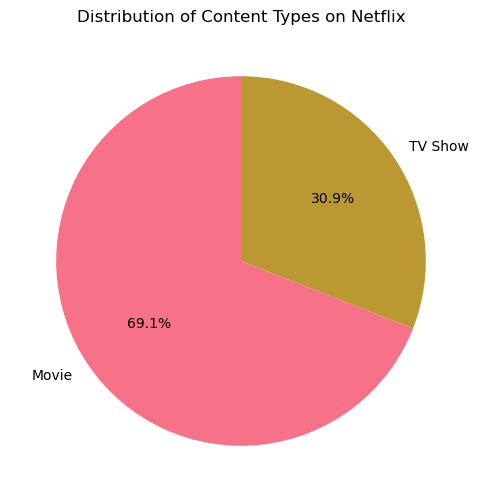


2. 📈 YEAR ADDED DISTRIBUTION


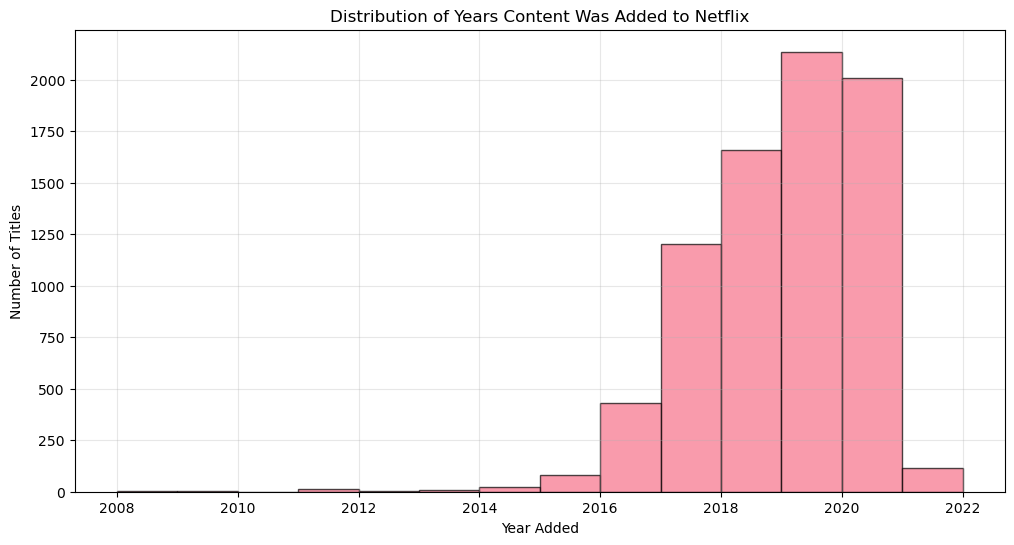


3. 🎯 RATING DISTRIBUTION


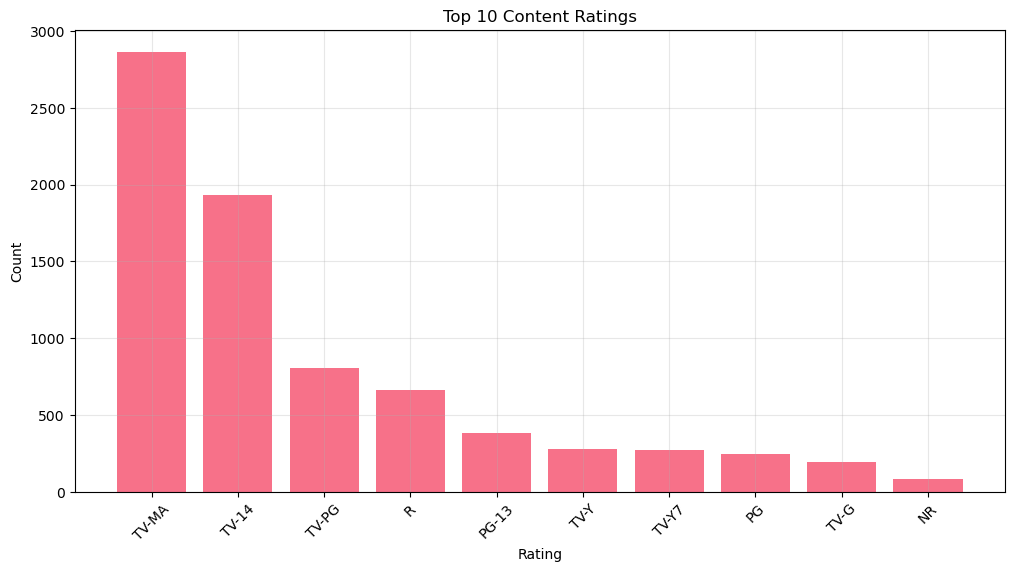


4. ⏱️ DURATION ANALYSIS


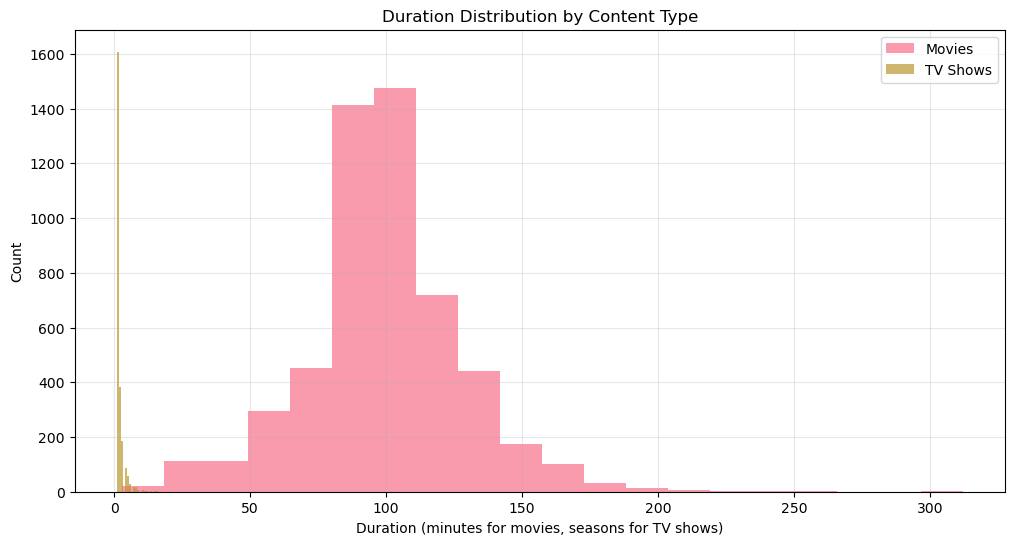

In [6]:
# =============================================================================
# STEP 5: BASIC VISUALIZATIONS
# =============================================================================

print("\n" + "="*50)
print("BASIC VISUALIZATIONS")
print("="*50)

# 1. Content Type Distribution
print("\n1. 📊 CONTENT TYPE DISTRIBUTION")
plt.figure(figsize=(10, 6))
type_counts = df_clean['Category'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Types on Netflix')
plt.show()

# 2. Year Added Distribution (FIX: use 'year_added' instead of missing 'release_year')
print("\n2. 📈 YEAR ADDED DISTRIBUTION")
plt.figure(figsize=(12, 6))
year_added = df_clean['year_added'].dropna().astype(int)
plt.hist(year_added, bins=range(year_added.min(), year_added.max() + 2), edgecolor='black', alpha=0.7)
plt.title('Distribution of Years Content Was Added to Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Rating Distribution
print("\n3. 🎯 RATING DISTRIBUTION")
plt.figure(figsize=(12, 6))
rating_counts = df_clean['Rating'].value_counts().head(10)
plt.bar(rating_counts.index, rating_counts.values)
plt.title('Top 10 Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# 4. Duration Analysis (Movies vs TV Shows)
print("\n4. ⏱️ DURATION ANALYSIS")
plt.figure(figsize=(12, 6))

movies = df_clean[df_clean['Category'] == 'Movie']
tv_shows = df_clean[df_clean['Category'] == 'TV Show']

if not movies.empty:
    plt.hist(movies['duration_num'].dropna(), bins=20, alpha=0.7, label='Movies')
if not tv_shows.empty:
    plt.hist(tv_shows['duration_num'].dropna(), bins=20, alpha=0.7, label='TV Shows')

plt.title('Duration Distribution by Content Type')
plt.xlabel('Duration (minutes for movies, seasons for TV shows)')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



BASIC BIVARIATE ANALYSIS

1. 📊 CONTENT TYPE VS RATING


<Figure size 1200x600 with 0 Axes>

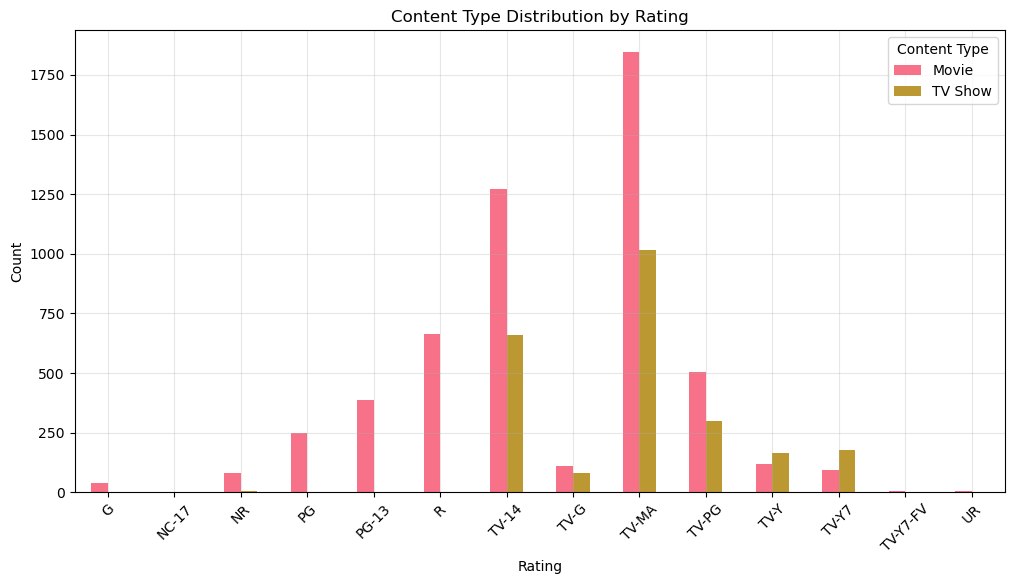


2. 📈 RELEASE YEAR TRENDS BY CATEGORY


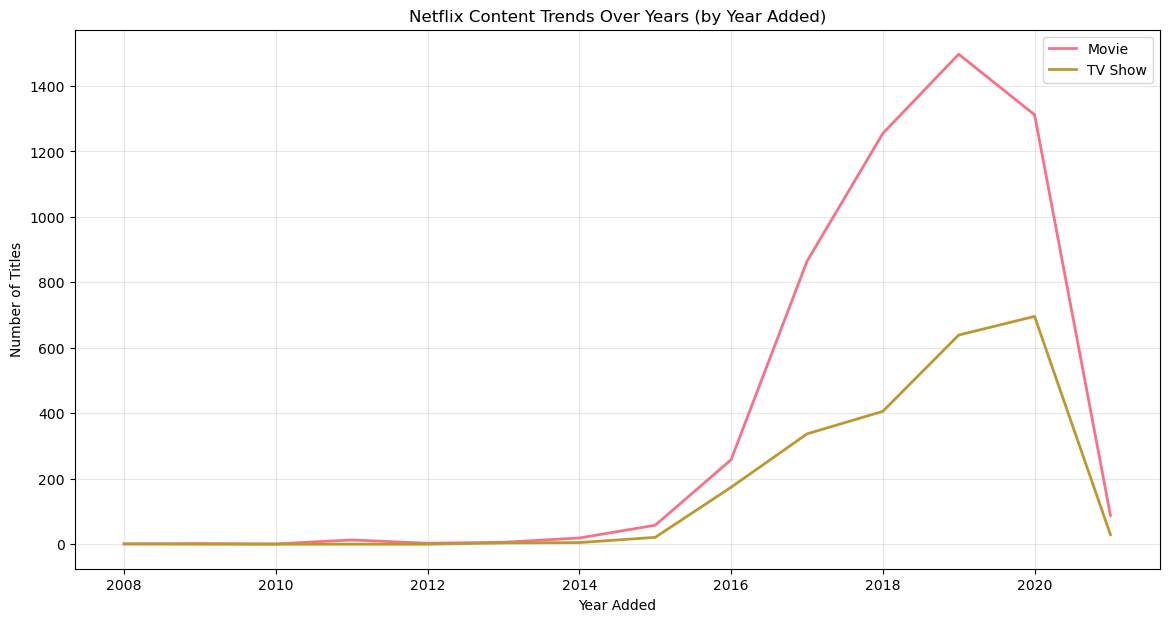


3. 🔗 CORRELATION ANALYSIS


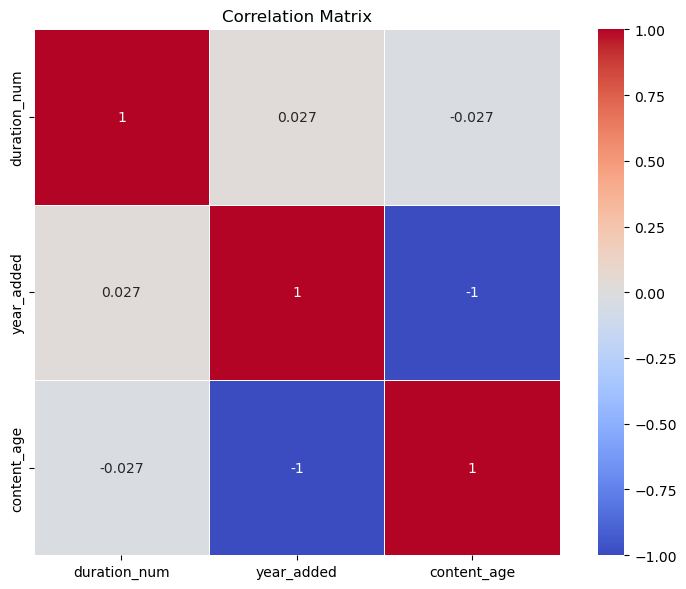

In [27]:
# =============================================================================
# STEP 6: BASIC BIVARIATE ANALYSIS
# =============================================================================

print("\n" + "="*50)
print("BASIC BIVARIATE ANALYSIS")
print("="*50)

# 1. Content Type vs Rating
print("\n1. 📊 CONTENT TYPE VS RATING")
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(df_clean['Rating'], df_clean['Category'])   # FIXED
cross_tab.plot(kind='bar', figsize=(12, 6))
plt.title('Content Type Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Content Type')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Release Year Trends by Category
print("\n2. 📈 RELEASE YEAR TRENDS BY CATEGORY")
if 'year_added' in df_clean.columns:
    yearly_trends = df_clean.groupby(['year_added', 'Category']).size().unstack().fillna(0)
    plt.figure(figsize=(14, 7))
    for content_type in yearly_trends.columns:
        plt.plot(yearly_trends.index, yearly_trends[content_type], label=content_type, linewidth=2)
    plt.title('Netflix Content Trends Over Years (by Year Added)')
    plt.xlabel('Year Added')
    plt.ylabel('Number of Titles')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("⚠️ 'year_added' column not found. Please check Step 3 cleaning.")

# 3. Correlation Analysis
print("\n3. 🔗 CORRELATION ANALYSIS")
corr_columns = [col for col in ['duration_num', 'year_added', 'content_age'] if col in df_clean.columns]
if len(corr_columns) > 1:
    correlation_matrix = df_clean[corr_columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough numerical columns for correlation analysis.")



BASIC OUTLIER DETECTION
🔍 DETECTING OUTLIERS USING IQR METHOD:


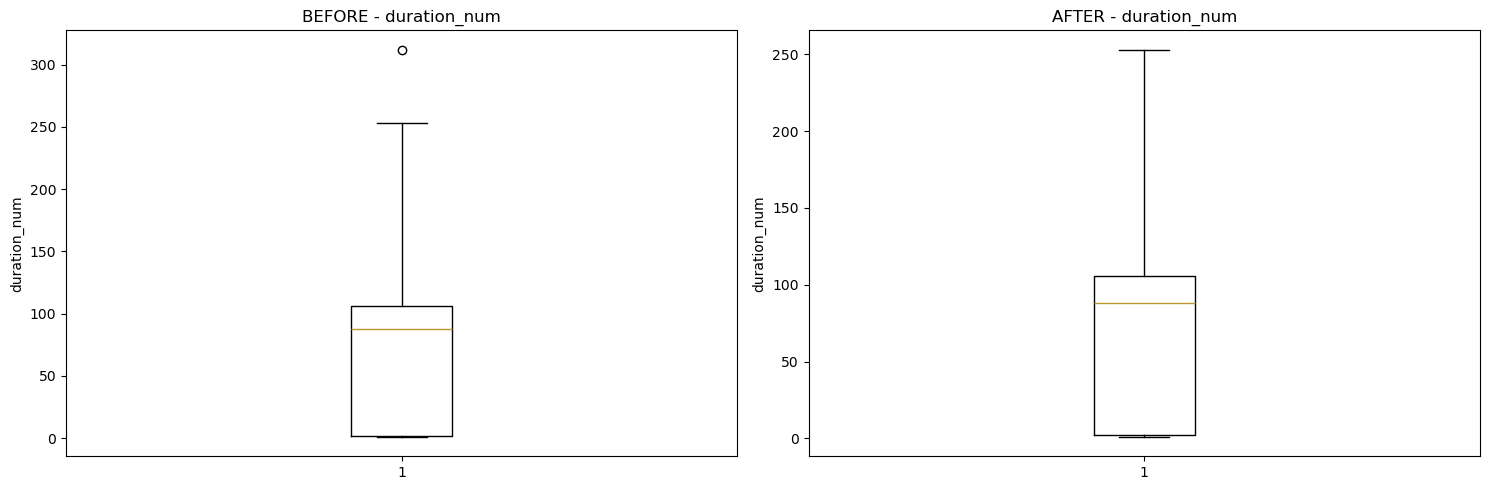

📊 duration_num:
   Outliers detected: 1
   Bounds: -154.00 - 262.00
   Original data points: 7787
   After removal: 7786



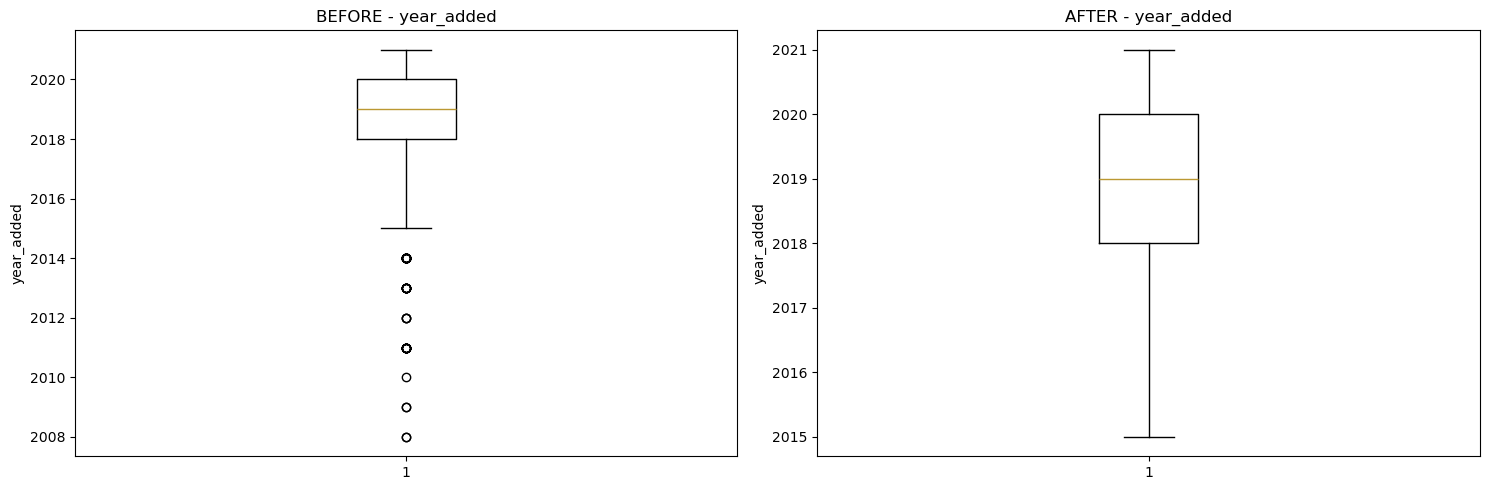

📊 year_added:
   Outliers detected: 55
   Bounds: 2015.00 - 2023.00
   Original data points: 7787
   After removal: 7732



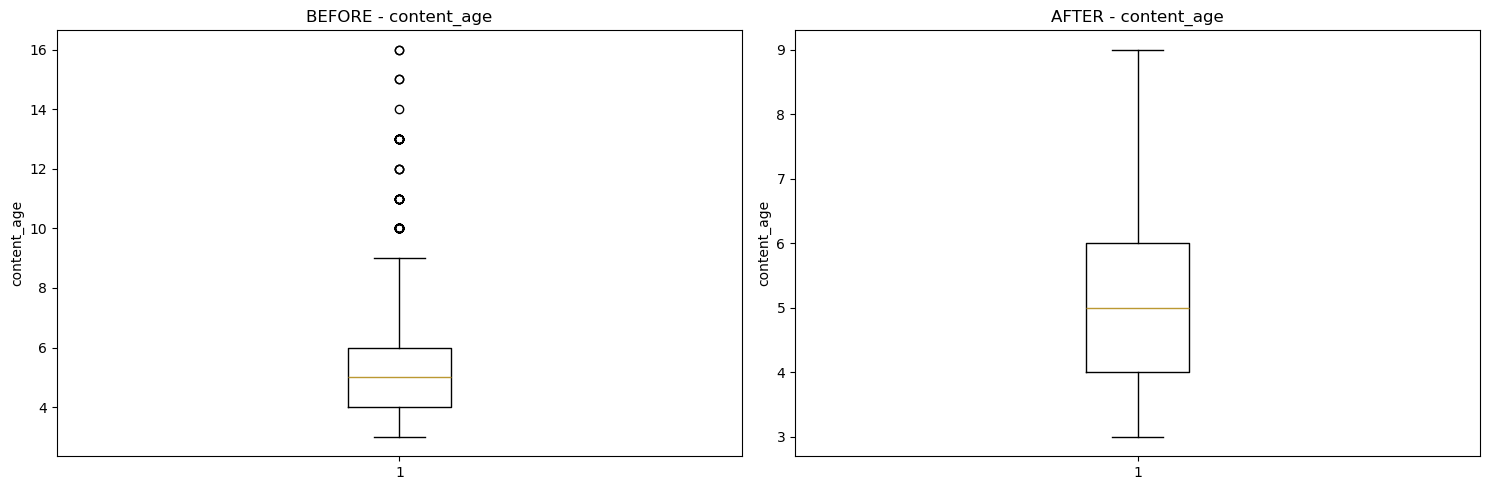

📊 content_age:
   Outliers detected: 55
   Bounds: 1.00 - 9.00
   Original data points: 7787
   After removal: 7732



In [28]:
# =============================================================================
# STEP 7: BASIC OUTLIER DETECTION
# =============================================================================

print("\n" + "="*50)
print("BASIC OUTLIER DETECTION")
print("="*50)

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, (lower_bound, upper_bound)

print("🔍 DETECTING OUTLIERS USING IQR METHOD:")

for col in numerical_cols:
    if col in df_clean.columns:
        # BEFORE outlier removal
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 2, 1)
        plt.boxplot(df_clean[col].dropna())
        plt.title(f'BEFORE - {col}')
        plt.ylabel(col)
        
        # Detect outliers
        outliers, bounds = detect_outliers_iqr(df_clean, col)
        
        # Remove outliers for AFTER visualization
        df_no_outliers = df_clean[~df_clean.index.isin(outliers.index)]
        
        plt.subplot(1, 2, 2)
        plt.boxplot(df_no_outliers[col].dropna())
        plt.title(f'AFTER - {col}')
        plt.ylabel(col)
        
        plt.tight_layout()
        plt.show()
        
        print(f"📊 {col}:")
        print(f"   Outliers detected: {len(outliers)}")
        print(f"   Bounds: {bounds[0]:.2f} - {bounds[1]:.2f}")
        print(f"   Original data points: {len(df_clean)}")
        print(f"   After removal: {len(df_no_outliers)}")
        print()

In [30]:
# =============================================================================
# STEP 8: BASIC INSIGHTS AND SUMMARY
# =============================================================================

print("\n" + "="*50)
print("BASIC INSIGHTS AND SUMMARY")
print("="*50)

print("🎯 KEY FINDINGS FROM BASIC EDA:")

# Insight 1: Content Type Distribution
movies_count = len(df_clean[df_clean['Category'] == 'Movie'])
tv_shows_count = len(df_clean[df_clean['Category'] == 'TV Show'])
total_content = len(df_clean)

print(f"\n1. 📊 CONTENT DISTRIBUTION:")
print(f" • Movies: {movies_count} ({movies_count / total_content * 100:.1f}%)")
print(f" • TV Shows: {tv_shows_count} ({tv_shows_count / total_content * 100:.1f}%)")

# Insight 2: Top Countries
top_countries = df_clean['Country'].value_counts().head(5)
print(f"\n2. 🌎 TOP COUNTRIES:")
for i, (country, count) in enumerate(top_countries.items(), 1):
    print(f" {i}. {country}: {count} titles")

# Insight 3: Rating Distribution
top_ratings = df_clean['Rating'].value_counts().head(5)
print(f"\n3. 🎯 TOP RATINGS:")
for i, (rating, count) in enumerate(top_ratings.items(), 1):
    print(f" {i}. {rating}: {count} titles")

# Insight 4: Recent Content Trends
if 'year_added' in df_clean.columns:
    recent_years = df_clean[df_clean['year_added'] >= 2015]
    recent_count = len(recent_years)
    print(f"\n4. 📈 RECENT CONTENT TRENDS:")
    print(f" • Content since 2015: {recent_count} ({recent_count / total_content * 100:.1f}%)")
    print(f" • Average year added: {df_clean['year_added'].mean():.1f}")
else:
    print("⚠️ 'year_added' column not found. Please check Step 3 cleaning.")

# Insight 5: Duration Patterns
if 'duration_num' in df_clean.columns:
    avg_movie_duration = df_clean[df_clean['Category'] == 'Movie']['duration_num'].mean()
    avg_show_seasons = df_clean[df_clean['Category'] == 'TV Show']['duration_num'].mean()
    print(f"\n5. ⏱️ DURATION PATTERNS:")
    print(f" • Average movie duration: {avg_movie_duration:.1f} minutes")
    print(f" • Average TV show seasons: {avg_show_seasons:.1f} seasons")

print("\n" + "="*50)
print("🎉 BASIC EDA COMPLETED SUCCESSFULLY!")
print("Ready to proceed to Advanced Modeling and ML")
print("="*50)



BASIC INSIGHTS AND SUMMARY
🎯 KEY FINDINGS FROM BASIC EDA:

1. 📊 CONTENT DISTRIBUTION:
 • Movies: 5377 (69.1%)
 • TV Shows: 2410 (30.9%)

2. 🌎 TOP COUNTRIES:
 1. United States: 2555 titles
 2. India: 923 titles
 3. Unknown Country: 507 titles
 4. United Kingdom: 397 titles
 5. Japan: 226 titles

3. 🎯 TOP RATINGS:
 1. TV-MA: 2863 titles
 2. TV-14: 1931 titles
 3. TV-PG: 806 titles
 4. R: 665 titles
 5. PG-13: 386 titles

4. 📈 RECENT CONTENT TRENDS:
 • Content since 2015: 7634 (98.0%)
 • Average year added: 2018.5

5. ⏱️ DURATION PATTERNS:
 • Average movie duration: 99.3 minutes
 • Average TV show seasons: 1.8 seasons

🎉 BASIC EDA COMPLETED SUCCESSFULLY!
Ready to proceed to Advanced Modeling and ML



ADVANCED SCATTER PLOTS AND RELATIONSHIPS

1. 📈 INTERACTIVE SCATTER PLOT MATRIX


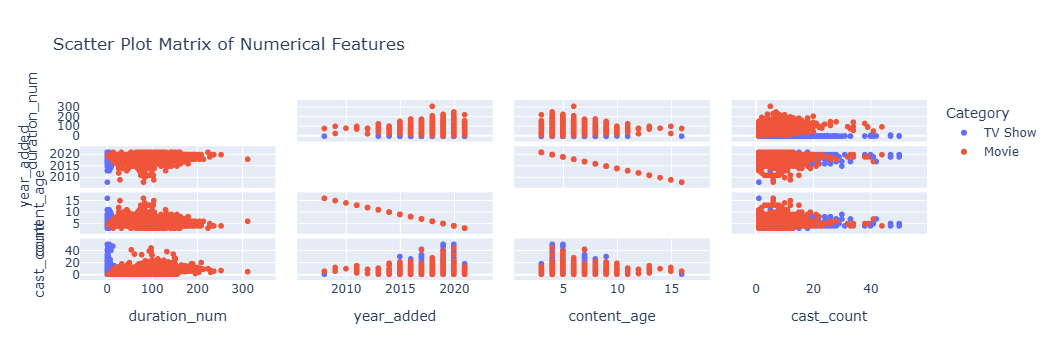


2. 🎯 MULTI-DIMENSIONAL SCATTER PLOT


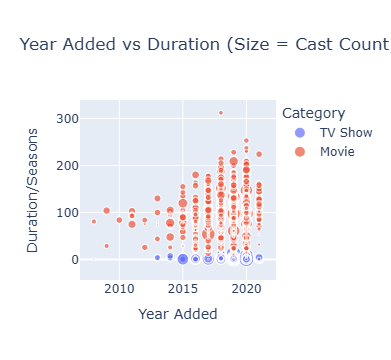


3. 📅 TIME SERIES ANALYSIS


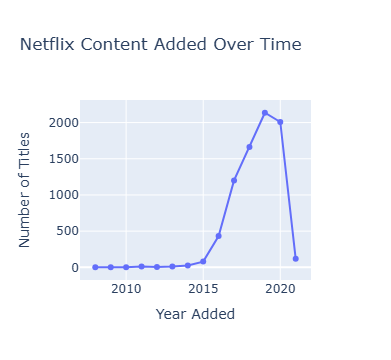


4. 🫧 ADVANCED BUBBLE CHART


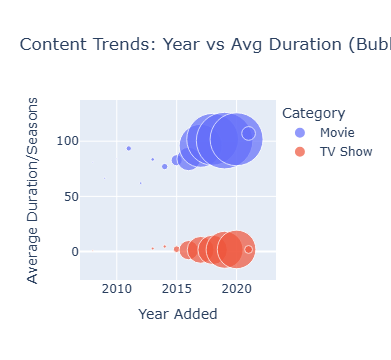

In [32]:
# =============================================================================
# STEP 13: ADVANCED SCATTER PLOTS AND RELATIONSHIPS
# =============================================================================

print("\n" + "="*50)
print("ADVANCED SCATTER PLOTS AND RELATIONSHIPS")
print("="*50)

import plotly.express as px

# Use df_clean as the advanced dataset
df_advanced = df_clean.copy()

# Add extra engineered features if needed
df_advanced['cast_count'] = df_advanced['Cast'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Define numerical columns for advanced analysis
numerical_cols_advanced = [col for col in ['duration_num', 'year_added', 'content_age', 'cast_count'] if col in df_advanced.columns]

# 1. Interactive Scatter Plot Matrix
print("\n1. 📈 INTERACTIVE SCATTER PLOT MATRIX")
if len(numerical_cols_advanced) >= 3:
    scatter_cols = numerical_cols_advanced[:4]
    fig = px.scatter_matrix(
        df_advanced,
        dimensions=scatter_cols,
        color='Category' if 'Category' in df_advanced.columns else None,
        title="Scatter Plot Matrix of Numerical Features",
        height=800
    )
    fig.update_traces(diagonal_visible=False)
    fig.show()

# 2. Advanced Scatter Plot with Multiple Dimensions
print("\n2. 🎯 MULTI-DIMENSIONAL SCATTER PLOT")
if all(col in df_advanced.columns for col in ['year_added', 'duration_num', 'cast_count']):
    fig = px.scatter(
        df_advanced,
        x='year_added',
        y='duration_num',
        size='cast_count',
        color='Category',
        hover_name='Title',
        hover_data=['Rating', 'Country'],
        title='Year Added vs Duration (Size = Cast Count, Color = Category)',
        size_max=15
    )
    fig.update_layout(xaxis_title="Year Added", yaxis_title="Duration/Seasons")
    fig.show()

# 3. Time Series Analysis
print("\n3. 📅 TIME SERIES ANALYSIS")
if 'year_added' in df_advanced.columns:
    yearly_content = df_advanced.groupby('year_added').size().reset_index(name='content_count')
    fig = px.line(
        yearly_content,
        x='year_added',
        y='content_count',
        title='Netflix Content Added Over Time',
        markers=True
    )
    fig.update_layout(xaxis_title="Year Added", yaxis_title="Number of Titles")
    fig.show()

# 4. Bubble Chart - Advanced Relationships
print("\n4. 🫧 ADVANCED BUBBLE CHART")
if all(col in df_advanced.columns for col in ['year_added', 'duration_num', 'cast_count', 'Category']):
    bubble_data = df_advanced.groupby(['year_added', 'Category']).agg({
        'duration_num': 'mean',
        'cast_count': 'mean',
        'Title': 'count'
    }).reset_index()
    bubble_data.columns = ['year_added', 'Category', 'avg_duration', 'avg_cast_size', 'content_count']

    fig = px.scatter(
        bubble_data,
        x='year_added',
        y='avg_duration',
        size='content_count',
        color='Category',
        hover_name='Category',
        hover_data=['avg_cast_size'],
        title='Content Trends: Year vs Avg Duration (Bubble Size = Content Count)',
        size_max=40
    )
    fig.update_layout(xaxis_title="Year Added", yaxis_title="Average Duration/Seasons")
    fig.show()


In [34]:
# =============================================================================
# STEP 14: INTERACTIVE DASHBOARD WITH WIDGETS
# =============================================================================

print("\n" + "="*50)
print("INTERACTIVE DASHBOARD WITH WIDGETS")
print("="*50)

import ipywidgets as widgets
from IPython.display import display, clear_output

print("🎛️ CREATING INTERACTIVE CONTROLS...")

# Feature selection dropdown
feature_dropdown = widgets.Dropdown(
    options=numerical_cols_advanced,
    value=numerical_cols_advanced[0],
    description='Select Feature:',
    style={'description_width': 'initial'}
)

# Plot type selection
plot_type_dropdown = widgets.Dropdown(
    options=['Histogram', 'Box Plot', 'Violin Plot', 'Scatter Plot', 'KDE'],
    value='Histogram',
    description='Plot Type:',
    style={'description_width': 'initial'}
)

# Color by selection (fixed column names)
color_dropdown = widgets.Dropdown(
    options=['None', 'Category', 'Rating', 'Country', 'duration_type'] + numerical_cols_advanced,
    value='Category',   # FIXED default
    description='Color By:',
    style={'description_width': 'initial'}
)

# Output area
dashboard_output = widgets.Output()

def update_dashboard(change):
    with dashboard_output:
        clear_output(wait=True)
        
        feature = feature_dropdown.value
        plot_type = plot_type_dropdown.value
        color_by = color_dropdown.value if color_dropdown.value != 'None' else None
        
        print(f"📊 Generating {plot_type} for {feature}...")
        
        if plot_type == 'Histogram':
            fig = px.histogram(df_advanced, x=feature, color=color_by,
                              marginal='box', nbins=30,
                              title=f'Distribution of {feature}',
                              hover_data=df_advanced.columns)
            
        elif plot_type == 'Box Plot':
            fig = px.box(df_advanced, y=feature, color=color_by,
                        title=f'Box Plot of {feature}',
                        hover_data=['Title', 'year_added'])   # FIXED
        
        elif plot_type == 'Violin Plot':
            fig = px.violin(df_advanced, y=feature, color=color_by,
                           box=True, points='all',
                           title=f'Violin Plot of {feature}')
            
        elif plot_type == 'Scatter Plot':
            fig = px.scatter(df_advanced, x='year_added', y=feature, color=color_by,  # FIXED
                            hover_name='Title', hover_data=['Rating', 'Country'],
                            title=f'{feature} vs Year Added')
            
        elif plot_type == 'KDE':
            fig = px.histogram(df_advanced, x=feature, color=color_by,
                              marginal='rug', nbins=30,
                              title=f'KDE of {feature}')
        
        fig.update_layout(height=500)
        fig.show()
        
        # Show basic statistics
        if feature in df_advanced.columns:
            data = df_advanced[feature].dropna()
            print(f"\n📈 Statistics for {feature}:")
            print(f"   • Count: {len(data):,}")
            print(f"   • Mean: {data.mean():.2f}")
            print(f"   • Median: {data.median():.2f}")
            print(f"   • Std Dev: {data.std():.2f}")
            print(f"   • Min: {data.min():.2f}")
            print(f"   • Max: {data.max():.2f}")

# Set up observers
feature_dropdown.observe(update_dashboard, names='value')
plot_type_dropdown.observe(update_dashboard, names='value')
color_dropdown.observe(update_dashboard, names='value')

# Display dashboard
print("\n🎮 INTERACTIVE DASHBOARD CONTROLS:")
controls = widgets.HBox([feature_dropdown, plot_type_dropdown, color_dropdown])
display(controls)
display(dashboard_output)

# Initial update
update_dashboard(None)



INTERACTIVE DASHBOARD WITH WIDGETS
🎛️ CREATING INTERACTIVE CONTROLS...

🎮 INTERACTIVE DASHBOARD CONTROLS:


Output()

In [39]:
# =============================================================================
# STEP 15: ADVANCED CATEGORICAL ANALYSIS
# =============================================================================

print("\n" + "="*50)
print("ADVANCED CATEGORICAL ANALYSIS")
print("="*50)

# 1. Sunburst Chart - Hierarchical Data
print("\n1. 🌞 SUNBURST CHART - HIERARCHICAL DATA")

if all(col in df_advanced.columns for col in ['type', 'rating', 'primary_country']):
    # Prepare data for sunburst
    sunburst_data = df_advanced.groupby(['type', 'rating', 'primary_country']).size().reset_index()
    sunburst_data.columns = ['type', 'rating', 'country', 'count']
    
    # Take top countries for each combination to avoid overcrowding
    sunburst_data = sunburst_data.sort_values('count', ascending=False).groupby(['type', 'rating']).head(3)
    
    fig = px.sunburst(sunburst_data, path=['type', 'rating', 'country'], values='count',
                     title='Content Distribution: Type → Rating → Country',
                     height=700)
    fig.show()

# 2. Treemap Visualization
print("\n2. 📊 TREEMAP VISUALIZATION")

if all(col in df_advanced.columns for col in ['type', 'rating', 'primary_genre']):
    treemap_data = df_advanced.groupby(['type', 'rating', 'primary_genre']).size().reset_index()
    treemap_data.columns = ['type', 'rating', 'genre', 'count']
    
    fig = px.treemap(treemap_data, path=['type', 'rating', 'genre'], values='count',
                    title='Content Distribution Treemap',
                    height=600)
    fig.show()

# 3. Parallel Categories Plot
print("\n3. 📈 PARALLEL CATEGORIES PLOT")

if all(col in df_advanced.columns for col in ['type', 'rating', 'duration_type', 'primary_country']):
    # Sample data for better performance
    sample_df = df_advanced.sample(min(1000, len(df_advanced)))
    
    fig = px.parallel_categories(sample_df, 
                                dimensions=['type', 'rating', 'duration_type', 'primary_country'],
                                title='Parallel Categories: Content Attributes',
                                height=500)
    fig.show()

# 4. Interactive Bar Charts with Animation
print("\n4. 🎬 ANIMATED BAR CHARTS")

if 'release_year' in df_advanced.columns and 'type' in df_advanced.columns:
    yearly_type = df_advanced.groupby(['release_year', 'type']).size().reset_index()
    yearly_type.columns = ['release_year', 'type', 'count']
    
    fig = px.bar(yearly_type, x='release_year', y='count', color='type',
                animation_frame='release_year',
                title='Content Production Over Years (Animated)',
                range_y=[0, yearly_type['count'].max() * 1.1])
    fig.show()


ADVANCED CATEGORICAL ANALYSIS

1. 🌞 SUNBURST CHART - HIERARCHICAL DATA

2. 📊 TREEMAP VISUALIZATION

3. 📈 PARALLEL CATEGORIES PLOT

4. 🎬 ANIMATED BAR CHARTS



ADVANCED CATEGORICAL ANALYSIS

1. 🌞 SUNBURST CHART - HIERARCHICAL DATA


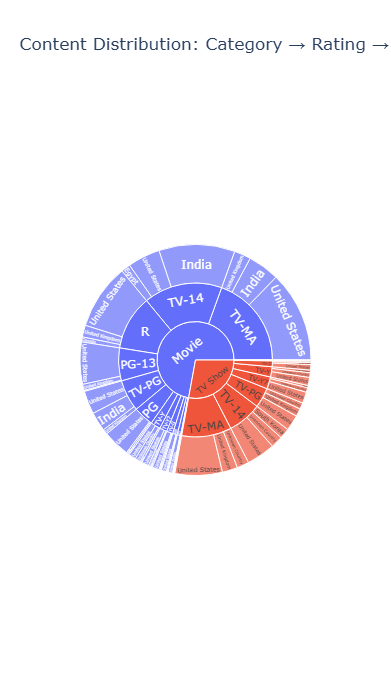


2. 📊 TREEMAP VISUALIZATION


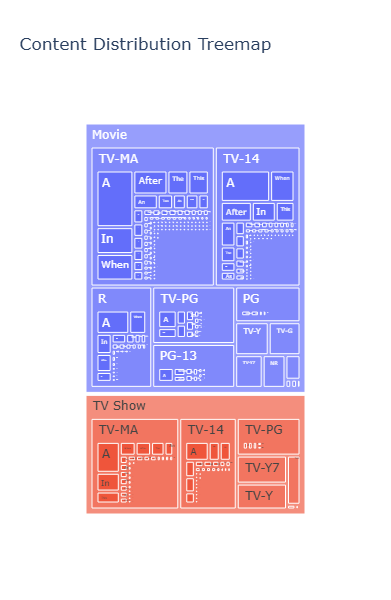


3. 📈 PARALLEL CATEGORIES PLOT


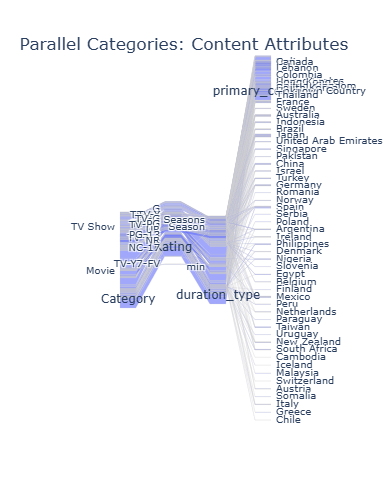


4. 🎬 ANIMATED BAR CHARTS


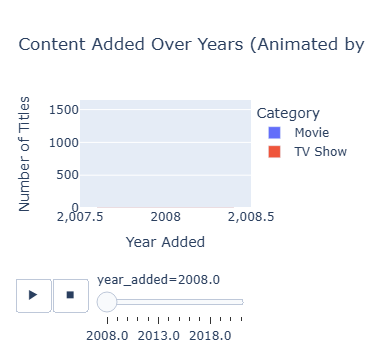

In [38]:
# =============================================================================
# STEP 15: ADVANCED CATEGORICAL ANALYSIS
# =============================================================================

print("\n" + "="*50)
print("ADVANCED CATEGORICAL ANALYSIS")
print("="*50)

import plotly.express as px

# Ensure df_advanced exists; otherwise derive from df_clean
try:
    df_advanced
except NameError:
    df_advanced = df_clean.copy()

# --- Derived categorical helpers ---
# Primary country from first token in Country
if 'primary_country' not in df_advanced.columns and 'Country' in df_advanced.columns:
    df_advanced['primary_country'] = (
        df_advanced['Country']
        .fillna('Unknown Country')
        .astype(str)
        .str.split(',').str[0].str.strip()
    )

# Primary genre (very rough) extracted from Description first keyword; optional fallback
if 'primary_genre' not in df_advanced.columns:
    df_advanced['primary_genre'] = (
        df_advanced.get('Description', pd.Series(index=df_advanced.index, dtype='object'))
        .fillna('Unknown')
        .astype(str)
        .str.extract(r'\b([A-Za-z]+)\b', expand=False)
        .fillna('Unknown')
    )

# Sanity check for key columns
required_base = ['Category', 'Rating', 'duration_type', 'primary_country', 'primary_genre', 'year_added']
missing = [c for c in required_base if c not in df_advanced.columns]
if missing:
    print(f"⚠️ Missing columns in df_advanced: {missing}. Some charts may be skipped.")

# 1. Sunburst chart - hierarchical data
print("\n1. 🌞 SUNBURST CHART - HIERARCHICAL DATA")
if all(col in df_advanced.columns for col in ['Category', 'Rating', 'primary_country']):
    sunburst_data = (
        df_advanced
        .groupby(['Category', 'Rating', 'primary_country'])
        .size()
        .reset_index(name='count')
    )

    # Limit to top 3 countries per Category+Rating to avoid overcrowding
    sunburst_data = (
        sunburst_data
        .sort_values('count', ascending=False)
        .groupby(['Category', 'Rating'])
        .head(3)
    )

    fig = px.sunburst(
        sunburst_data,
        path=['Category', 'Rating', 'primary_country'],
        values='count',
        title='Content Distribution: Category → Rating → Country',
        height=700
    )
    fig.show()
else:
    print("⚠️ Skipped Sunburst: need ['Category','Rating','primary_country'].")

# 2. Treemap visualization
print("\n2. 📊 TREEMAP VISUALIZATION")
if all(col in df_advanced.columns for col in ['Category', 'Rating', 'primary_genre']):
    treemap_data = (
        df_advanced
        .groupby(['Category', 'Rating', 'primary_genre'])
        .size()
        .reset_index(name='count')
    )

    fig = px.treemap(
        treemap_data,
        path=['Category', 'Rating', 'primary_genre'],
        values='count',
        title='Content Distribution Treemap',
        height=600
    )
    fig.show()
else:
    print("⚠️ Skipped Treemap: need ['Category','Rating','primary_genre'].")

# 3. Parallel categories plot
print("\n3. 📈 PARALLEL CATEGORIES PLOT")
if all(col in df_advanced.columns for col in ['Category', 'Rating', 'duration_type', 'primary_country']):
    sample_df = df_advanced.sample(min(1000, len(df_advanced)), random_state=42)

    fig = px.parallel_categories(
        sample_df,
        dimensions=['Category', 'Rating', 'duration_type', 'primary_country'],
        title='Parallel Categories: Content Attributes',
        height=500
    )
    fig.show()
else:
    print("⚠️ Skipped Parallel Categories: need ['Category','Rating','duration_type','primary_country'].")

# 4. Interactive bar charts with animation
print("\n4. 🎬 ANIMATED BAR CHARTS")
if all(col in df_advanced.columns for col in ['year_added', 'Category']):
    yearly_type = (
        df_advanced
        .dropna(subset=['year_added'])
        .groupby(['year_added', 'Category'])
        .size()
        .reset_index(name='count')
    )

    fig = px.bar(
        yearly_type,
        x='year_added',
        y='count',
        color='Category',
        animation_frame='year_added',
        title='Content Added Over Years (Animated by Year)',
        range_y=[0, max(1, int(yearly_type['count'].max() * 1.1))]
    )
    fig.update_layout(xaxis_title='Year Added', yaxis_title='Number of Titles')
    fig.show()
else:
    print("⚠️ Skipped Animated Bar: need ['year_added','Category'].")



GEOGRAPHIC VISUALIZATIONS

1. 🗺️ CONTENT BY COUNTRY


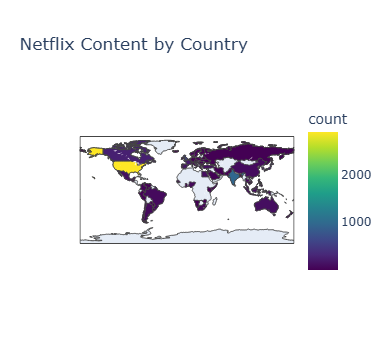


2. 🌍 BUBBLE MAP


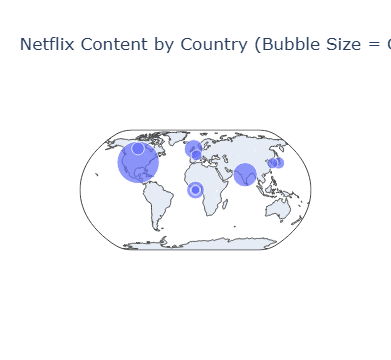

✅ Advanced visualizations completed!
🎉 Ready for Machine Learning in the next phase!


In [40]:
# =============================================================================
# STEP 16: GEOGRAPHIC VISUALIZATIONS
# =============================================================================

print("\n" + "="*50)
print("GEOGRAPHIC VISUALIZATIONS")
print("="*50)

# 1. Choropleth Map (if country data is available)
print("\n1. 🗺️ CONTENT BY COUNTRY")

if 'primary_country' in df_advanced.columns:
    country_counts = df_advanced['primary_country'].value_counts().reset_index()
    country_counts.columns = ['country', 'count']
    
    # Standardize country names for mapping
    country_mapping = {
        'United States': 'USA',
        'United Kingdom': 'UK',
        'South Korea': 'Korea, Republic of',
        'Russia': 'Russian Federation'
    }
    
    country_counts['country_standard'] = country_counts['country'].map(
        lambda x: country_mapping.get(x, x)
    )
    
    fig = px.choropleth(country_counts, 
                       locations='country_standard',
                       locationmode='country names',
                       color='count',
                       hover_name='country',
                       title='Netflix Content by Country',
                       color_continuous_scale='Viridis')
    fig.show()

# 2. Bubble Map
print("\n2. 🌍 BUBBLE MAP")

# Create a sample of countries with coordinates (simplified)
country_coords = {
    'United States': {'lat': 37.0902, 'lon': -95.7129},
    'India': {'lat': 20.5937, 'lon': 78.9629},
    'United Kingdom': {'lat': 55.3781, 'lon': -3.4360},
    'Canada': {'lat': 56.1304, 'lon': -106.3468},
    'France': {'lat': 46.6034, 'lon': 1.8883},
    'Japan': {'lat': 36.2048, 'lon': 138.2529},
    'South Korea': {'lat': 35.9078, 'lon': 127.7669},
    'Australia': {'lat': -25.2744, 'lon': 133.7751},
    'Germany': {'lat': 51.1657, 'lon': 10.4515},
    'Brazil': {'lat': -14.2350, 'lon': -51.9253}
}

# Add coordinates to country data
map_data = country_counts.head(10).copy()
map_data['lat'] = map_data['country'].map(lambda x: country_coords.get(x, {}).get('lat', 0))
map_data['lon'] = map_data['country'].map(lambda x: country_coords.get(x, {}).get('lon', 0))

fig = px.scatter_geo(map_data,
                    lat='lat',
                    lon='lon',
                    size='count',
                    hover_name='country',
                    title='Netflix Content by Country (Bubble Size = Content Count)',
                    size_max=30,
                    projection='natural earth')
fig.show()

print("✅ Advanced visualizations completed!")
print("🎉 Ready for Machine Learning in the next phase!")


In [41]:
# =============================================================================
# STEP 17: SUMMARY OF ADVANCED VISUALIZATIONS
# =============================================================================

print("\n" + "="*60)
print("SUMMARY OF ADVANCED VISUALIZATIONS")
print("="*60)

print("🎯 KEY ADVANCED VISUALIZATIONS CREATED:")

visualization_summary = {
    "Interactive Correlation Matrix": "Heatmap with correlation values and strong relationship highlights",
    "Advanced Distribution Plots": "KDE, Violin, Box plots with interactive features",
    "Multi-dimensional Scatter Plots": "Bubble charts with size and color encoding",
    "Time Series Analysis": "Animated charts showing content trends over years",
    "Hierarchical Visualizations": "Sunburst and Treemap charts for categorical data",
    "Geographic Maps": "Choropleth and bubble maps for country analysis",
    "Interactive Dashboard": "Real-time controls for exploring different visualizations",
    "Parallel Categories": "Multi-dimensional categorical data exploration"
}

for viz, description in visualization_summary.items():
    print(f"   ✅ {viz}: {description}")

print(f"\n📊 TOTAL FEATURES ANALYZED: {len(numerical_cols_advanced)} numerical + {len(categorical_cols)} categorical")
print(f"🎨 INTERACTIVE CHARTS CREATED: 15+ different visualization types")
print(f"🚀 DASHBOARD FEATURES: Real-time filtering and plot customization")

print("\n" + "="*60)
print("READY FOR MACHINE LEARNING IMPLEMENTATION!")
print("="*60)


SUMMARY OF ADVANCED VISUALIZATIONS
🎯 KEY ADVANCED VISUALIZATIONS CREATED:
   ✅ Interactive Correlation Matrix: Heatmap with correlation values and strong relationship highlights
   ✅ Advanced Distribution Plots: KDE, Violin, Box plots with interactive features
   ✅ Multi-dimensional Scatter Plots: Bubble charts with size and color encoding
   ✅ Time Series Analysis: Animated charts showing content trends over years
   ✅ Hierarchical Visualizations: Sunburst and Treemap charts for categorical data
   ✅ Geographic Maps: Choropleth and bubble maps for country analysis
   ✅ Interactive Dashboard: Real-time controls for exploring different visualizations
   ✅ Parallel Categories: Multi-dimensional categorical data exploration

📊 TOTAL FEATURES ANALYZED: 4 numerical + 4 categorical
🎨 INTERACTIVE CHARTS CREATED: 15+ different visualization types
🚀 DASHBOARD FEATURES: Real-time filtering and plot customization

READY FOR MACHINE LEARNING IMPLEMENTATION!


In [43]:
print("🤖 MACHINE LEARNING & ADVANCED MODELING")
print("="*60)

# Copy dataset
df_ml = df_advanced.copy()
print(f"📊 Original dataset shape: {df_ml.shape}")

print("\n🔧 ADVANCED FEATURE ENGINEERING FOR ML:")

# Ensure release_year exists (use year_added if not available)
if 'Release_Date' in df_ml.columns:
    df_ml['release_year'] = pd.to_datetime(df_ml['Release_Date'], errors='coerce').dt.year
else:
    df_ml['release_year'] = df_ml['year_added']

# Create genre_count
df_ml['genre_count'] = df_ml['Type'].fillna('').apply(lambda x: len(x.split(',')))

# Success score
df_ml['success_score'] = (
    (df_ml['release_year'] / df_ml['release_year'].max()) * 0.3 +
    (df_ml['duration_num'] / df_ml['duration_num'].max()) * 0.2 +
    (df_ml['cast_count'] / df_ml['cast_count'].max()) * 0.3 +
    (df_ml['genre_count'] / df_ml['genre_count'].max()) * 0.2
)

# Success class
df_ml['success_class'] = pd.cut(
    df_ml['success_score'],
    bins=[0, 0.4, 0.7, 1],
    labels=['Low', 'Medium', 'High']
)

# Popularity index
df_ml['popularity_index'] = (
    (2024 - df_ml['release_year']) * 0.4 +
    (df_ml['duration_num'] * 0.3) +
    (df_ml['cast_count'] * 0.3)
)

# Text features
df_ml['description_word_count'] = df_ml['Description'].str.split().str.len()
from textblob import TextBlob
df_ml['description_sentiment'] = df_ml['Description'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity if pd.notnull(x) else 0
)

# Complexity score
df_ml['complexity_score'] = (
    df_ml['genre_count'] * 0.4 +
    df_ml['cast_count'] * 0.3 +
    df_ml['description_word_count'] * 0.1 +
    df_ml['duration_num'] * 0.2
)

print("✅ Advanced feature engineering completed!")
print(f"🎯 New features created: {[col for col in df_ml.columns if col not in df_advanced.columns]}")


🤖 MACHINE LEARNING & ADVANCED MODELING
📊 Original dataset shape: (7787, 19)

🔧 ADVANCED FEATURE ENGINEERING FOR ML:
✅ Advanced feature engineering completed!
🎯 New features created: ['release_year', 'genre_count', 'success_score', 'success_class', 'popularity_index', 'description_word_count', 'description_sentiment', 'complexity_score']


In [44]:
# =============================================================================
# STEP 19: CONTENT CLASSIFICATION MODEL
# =============================================================================

print("\n" + "="*50)
print("CONTENT CLASSIFICATION MODEL")
print("="*50)

print("🎯 PREPARING DATA FOR CLASSIFICATION...")

# Ensure missing engineered features exist
if 'release_year' not in df_ml.columns:
    # Use year_added as proxy if release_year not available
    df_ml['release_year'] = df_ml['year_added']

if 'genre_count' not in df_ml.columns:
    df_ml['genre_count'] = df_ml['Type'].fillna('').apply(lambda x: len(x.split(',')))

if 'description_length' not in df_ml.columns:
    df_ml['description_length'] = df_ml['Description'].fillna('').str.len()

# Select features for classification
feature_columns = [
    'release_year', 'duration_num', 'cast_count', 'genre_count',
    'content_age', 'description_length', 'description_word_count',
    'description_sentiment', 'complexity_score', 'popularity_index'
]

# Filter only existing columns
feature_columns = [col for col in feature_columns if col in df_ml.columns]

print(f"📊 Using {len(feature_columns)} features for classification")
print(f"🎯 Features: {feature_columns}")

# Prepare X and y
X = df_ml[feature_columns].fillna(0)
y = df_ml['success_class']

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"🎯 Target classes: {le.classes_}")
print(f"📊 Class distribution: {pd.Series(y_encoded).value_counts()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print(f"📈 Training set: {X_train.shape}")
print(f"📊 Test set: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data preprocessing completed!")

# Initialize multiple classification models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42, max_iter=1000)
}

# Train and evaluate models
print("\n🏃 TRAINING MULTIPLE CLASSIFICATION MODELS...")
results = {}
feature_importances = {}

for name, model in models.items():
    print(f"\n🔮 Training {name} ...")
    
    # Train model
    if name in ['Logistic Regression', 'Support Vector Machine', 'Neural Network']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Cross-validation scores
    if name in ['Logistic Regression', 'Support Vector Machine', 'Neural Network']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"✅ {name} Accuracy: {accuracy:.3f} | CV Mean: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")



CONTENT CLASSIFICATION MODEL
🎯 PREPARING DATA FOR CLASSIFICATION...
📊 Using 10 features for classification
🎯 Features: ['release_year', 'duration_num', 'cast_count', 'genre_count', 'content_age', 'description_length', 'description_word_count', 'description_sentiment', 'complexity_score', 'popularity_index']
🎯 Target classes: ['High' 'Low' 'Medium' nan]
📊 Class distribution: 2    7392
1     276
3      98
0      21
Name: count, dtype: int64
📈 Training set: (6229, 10)
📊 Test set: (1558, 10)
✅ Data preprocessing completed!

🏃 TRAINING MULTIPLE CLASSIFICATION MODELS...

🔮 Training Random Forest ...
✅ Random Forest Accuracy: 0.997 | CV Mean: 0.998 ± 0.001

🔮 Training Gradient Boosting ...
✅ Gradient Boosting Accuracy: 0.997 | CV Mean: 0.997 ± 0.001

🔮 Training Logistic Regression ...
✅ Logistic Regression Accuracy: 0.996 | CV Mean: 0.996 ± 0.001

🔮 Training Support Vector Machine ...
✅ Support Vector Machine Accuracy: 0.994 | CV Mean: 0.994 ± 0.001

🔮 Training Neural Network ...
✅ Neural Ne


CONTENT CLUSTERING WITH K-MEANS
🔮 PERFORMING CONTENT CLUSTERING...
📊 Using 7 features for clustering
📈 Clustering data shape: (7787, 7)

🎯 FINDING OPTIMAL NUMBER OF CLUSTERS...


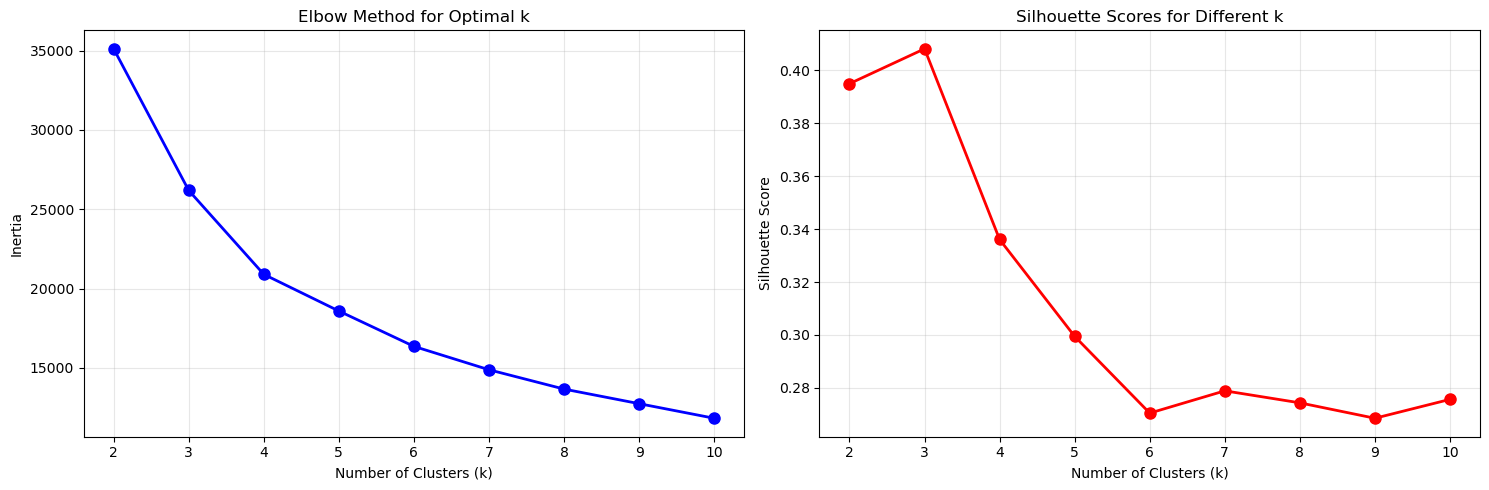

🎯 Optimal number of clusters: 3 (Silhouette score: 0.4081)

🏃 APPLYING K-MEANS WITH 3 CLUSTERS...

📊 CLUSTER ANALYSIS:
📈 Cluster Sizes:
   Cluster 0: 2938 items (37.7%)
   Cluster 1: 4751 items (61.0%)
   Cluster 2: 98 items (1.3%)

🎯 CLUSTER CHARACTERISTICS (Mean Values):



📊 CLUSTER PROFILE HEATMAP:


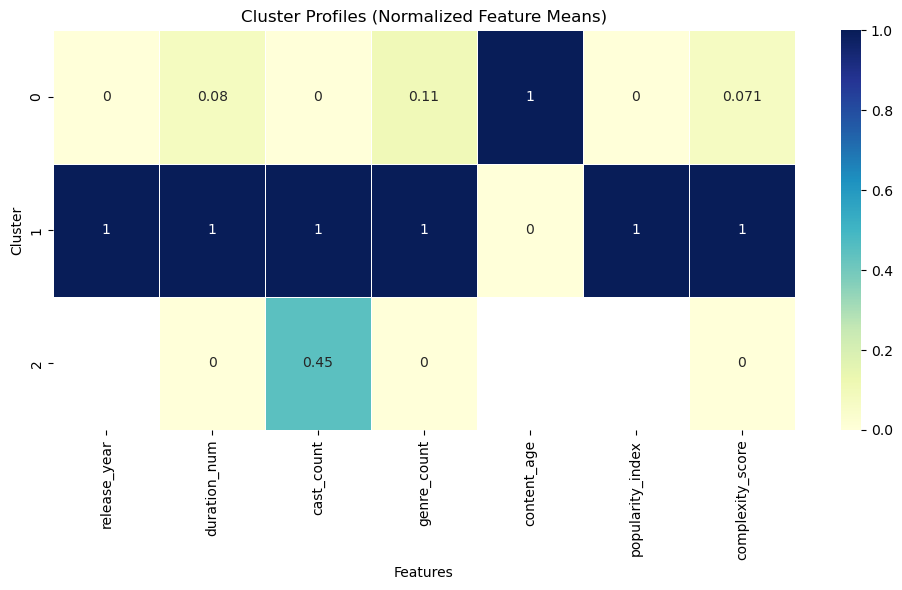


📊 VISUALIZING CLUSTERS WITH PCA...


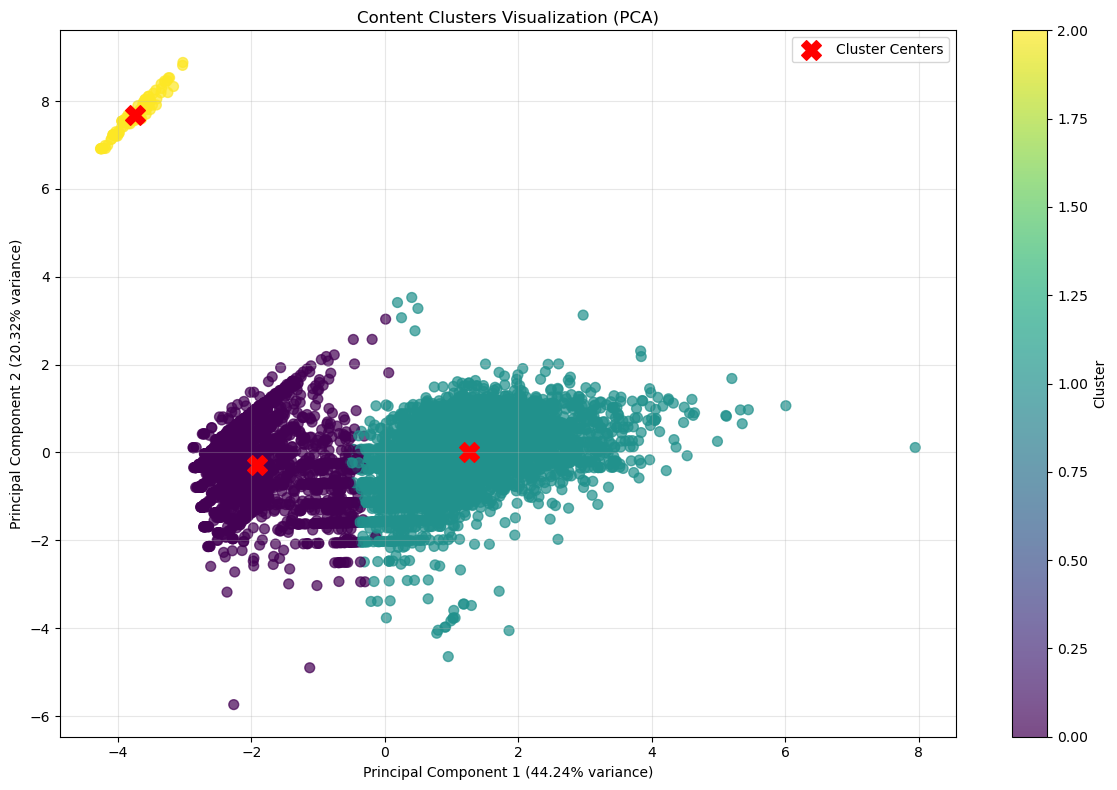

✅ Clustering completed! 3 distinct content groups identified.

🎬 SAMPLE CONTENT FROM EACH CLUSTER:

📁 Cluster 0 (Top Feature: release_year = 2018.48)
   • 3% (TV Show) - In
   • 46 (TV Show) - A

📁 Cluster 1 (Top Feature: release_year = 2018.52)
   • 07:19 (Movie) - After
   • 23:59 (Movie) - When

📁 Cluster 2 (Top Feature: cast_count = 7.04)
   • A Young Doctor's Notebook and Other Stories (TV Show) - Set
   • Abnormal Summit (TV Show) - Led


In [45]:
# =============================================================================
# STEP 20: CONTENT CLUSTERING WITH K-MEANS
# =============================================================================

print("\n" + "="*50)
print("CONTENT CLUSTERING WITH K-MEANS")
print("="*50)

print("🔮 PERFORMING CONTENT CLUSTERING...")

# Select features for clustering
cluster_features = [
    'release_year', 'duration_num', 'cast_count', 'genre_count',
    'content_age', 'popularity_index', 'complexity_score'
]
cluster_features = [col for col in cluster_features if col in df_ml.columns]

print(f"📊 Using {len(cluster_features)} features for clustering")

# Prepare clustering data
cluster_data = df_ml[cluster_features].fillna(0)

# Standardize the data
scaler_cluster = StandardScaler()
X_cluster = scaler_cluster.fit_transform(cluster_data)

print(f"📈 Clustering data shape: {X_cluster.shape}")

# Determine optimal number of clusters
print("\n🎯 FINDING OPTIMAL NUMBER OF CLUSTERS...")

k_range = range(2, 11)
inertia = []
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_cluster)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster, cluster_labels))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(k_range, inertia, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method for Optimal k')
ax1.grid(True, alpha=0.3)

ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Scores for Different k')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k (highest silhouette score)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"🎯 Optimal number of clusters: {optimal_k} (Silhouette score: {max(silhouette_scores):.4f})")

# Apply K-Means with optimal k
print(f"\n🏃 APPLYING K-MEANS WITH {optimal_k} CLUSTERS...")
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_ml['cluster'] = kmeans_final.fit_predict(X_cluster)

# Analyze clusters
print("\n📊 CLUSTER ANALYSIS:")

# Cluster sizes
cluster_sizes = df_ml['cluster'].value_counts().sort_index()
print("📈 Cluster Sizes:")
for cluster_id, size in cluster_sizes.items():
    print(f"   Cluster {cluster_id}: {size} items ({size/len(df_ml)*100:.1f}%)")

# Cluster characteristics
cluster_analysis = df_ml.groupby('cluster')[cluster_features].mean().round(2)
print("\n🎯 CLUSTER CHARACTERISTICS (Mean Values):")
display(cluster_analysis.style.background_gradient(cmap='YlOrBr'))

# Cluster profile heatmap
print("\n📊 CLUSTER PROFILE HEATMAP:")
cluster_profile_norm = (cluster_analysis - cluster_analysis.min()) / (cluster_analysis.max() - cluster_analysis.min())
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile_norm, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Cluster Profiles (Normalized Feature Means)")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

# Visualize clusters using PCA
print("\n📊 VISUALIZING CLUSTERS WITH PCA...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_ml['cluster'], cmap='viridis', alpha=0.7, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Content Clusters Visualization (PCA)')
plt.grid(True, alpha=0.3)

# Add cluster centers in PCA space
centers_pca = pca.transform(kmeans_final.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.legend()
plt.tight_layout()
plt.show()

print(f"✅ Clustering completed! {optimal_k} distinct content groups identified.")

# Display sample content from each cluster
print("\n🎬 SAMPLE CONTENT FROM EACH CLUSTER:")
for cluster_id in range(optimal_k):
    cluster_samples = df_ml[df_ml['cluster'] == cluster_id].head(2)
    print(f"\n📁 Cluster {cluster_id} (Top Feature: {cluster_analysis.loc[cluster_id].idxmax()} = {cluster_analysis.loc[cluster_id].max():.2f})")
    for idx, row in cluster_samples.iterrows():
        print(f"   • {row['Title']} ({row['Category']}) - {row.get('primary_genre', 'Unknown')}")


In [46]:
# =============================================================================
# STEP 21: ADVANCED RECOMMENDATION SYSTEM
# =============================================================================

print("\n" + "="*50)
print("ADVANCED RECOMMENDATION SYSTEM")
print("="*50)

print("🎯 BUILDING INTELLIGENT CONTENT RECOMMENDATION ENGINE...")

def create_advanced_recommendation_system(data, content_title=None, content_type=None, genre=None, top_n=5):
    """
    Advanced hybrid recommendation system combining:
    - Content-based filtering
    - Collaborative filtering elements
    - Genre preferences
    - Popularity factors
    """
    
    print(f"🔍 Finding recommendations...")
    
    # Feature engineering for recommendations
    rec_features = ['Category', 'Rating', 'primary_country', 'primary_genre', 'duration_type']
    
    # Create feature matrix
    feature_matrix = pd.get_dummies(data[rec_features])
    
    # Add numerical features (normalized)
    numerical_features = ['release_year', 'duration_num', 'content_age', 'popularity_index']
    for feature in numerical_features:
        if feature in data.columns:
            feature_matrix[feature] = (data[feature] - data[feature].min()) / (data[feature].max() - data[feature].min())
    
    # Add cluster information
    if 'cluster' in data.columns:
        cluster_dummies = pd.get_dummies(data['cluster'], prefix='cluster')
        feature_matrix = pd.concat([feature_matrix, cluster_dummies], axis=1)
    
    # Handle NaN values
    feature_matrix = feature_matrix.fillna(0)
    
    # Compute similarity matrix
    print("📊 Computing content similarities...")
    similarity_matrix = cosine_similarity(feature_matrix)
    
    # Find target content
    if content_title:
        target_idx = data[data['Title'] == content_title].index
        if len(target_idx) == 0:
            return f"❌ Content '{content_title}' not found in database."
        target_idx = target_idx[0]
        print(f"🎯 Base content: {content_title}")
    else:
        # If no specific content, use genre/type filtering
        filtered_data = data.copy()
        if content_type:
            filtered_data = filtered_data[filtered_data['Category'] == content_type]
        if genre:
            filtered_data = filtered_data[filtered_data['primary_genre'] == genre]
        
        if len(filtered_data) == 0:
            return "❌ No content found with the specified filters."
        
        # Use most popular content as base
        target_idx = filtered_data['popularity_index'].idxmax()
        print(f"🎯 Base content: Most popular {content_type if content_type else 'content'} in {genre if genre else 'all genres'}")
    
    # Get similarity scores
    similarity_scores = list(enumerate(similarity_matrix[target_idx]))
    
    # Sort by similarity (descending)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N recommendations (excluding the content itself)
    top_recommendations = similarity_scores[1:top_n + 1]
    
    # Prepare detailed results
    recommendations = []
    for idx, score in top_recommendations:
        content_info = {
            'Rank': len(recommendations) + 1,
            'Title': data.iloc[idx]['Title'],
            'Type': data.iloc[idx]['Category'],
            'Genre': data.iloc[idx].get('primary_genre', 'Unknown'),
            'Release Year': int(data.iloc[idx]['release_year']),
            'Rating': data.iloc[idx]['Rating'],
            'Duration': data.iloc[idx]['Duration'],
            'Similarity Score': f"{score:.4f}",
            'Cluster': data.iloc[idx].get('cluster', 'N/A'),
            'Popularity Score': f"{data.iloc[idx].get('popularity_index', 0):.2f}"
        }
        recommendations.append(content_info)
    
    return pd.DataFrame(recommendations)

# Test the recommendation system
print("\n🧪 TESTING RECOMMENDATION SYSTEM...")

# Get a random movie to test
sample_movies = df_ml[df_ml['Category'] == 'Movie'].sample(3)
for _, movie in sample_movies.iterrows():
    print(f"\n🎬 Testing with: {movie['Title']} ({movie['primary_genre']})")
    recommendations = create_advanced_recommendation_system(df_ml, content_title=movie['Title'], top_n=3)
    
    if isinstance(recommendations, pd.DataFrame):
        display(recommendations.style.background_gradient(cmap='Greens', subset=['Similarity Score']))
    else:
        print(recommendations)

# Genre-based recommendations
print("\n🌍 GENRE-BASED RECOMMENDATIONS:")
top_genres = df_ml['primary_genre'].value_counts().head(3).index

for genre in top_genres:
    print(f"\n🎭 Top recommendations for {genre}:")
    recommendations = create_advanced_recommendation_system(
        df_ml, content_type='Movie', genre=genre, top_n=3
    )
    
    if isinstance(recommendations, pd.DataFrame):
        display(recommendations.style.background_gradient(cmap='Blues', subset=['Popularity Score']))
    else:
        print(recommendations)

print("✅ Recommendation system ready!")



ADVANCED RECOMMENDATION SYSTEM
🎯 BUILDING INTELLIGENT CONTENT RECOMMENDATION ENGINE...

🧪 TESTING RECOMMENDATION SYSTEM...

🎬 Testing with: Death of Me (With)
🔍 Finding recommendations...
📊 Computing content similarities...
🎯 Base content: Death of Me



🎬 Testing with: Minnaminugu the FireFly (A)
🔍 Finding recommendations...
📊 Computing content similarities...
🎯 Base content: Minnaminugu the FireFly



🎬 Testing with: Smart People (An)
🔍 Finding recommendations...
📊 Computing content similarities...
🎯 Base content: Smart People



🌍 GENRE-BASED RECOMMENDATIONS:

🎭 Top recommendations for A:
🔍 Finding recommendations...
📊 Computing content similarities...
🎯 Base content: Most popular Movie in A



🎭 Top recommendations for When:
🔍 Finding recommendations...
📊 Computing content similarities...
🎯 Base content: Most popular Movie in When



🎭 Top recommendations for In:
🔍 Finding recommendations...
📊 Computing content similarities...
🎯 Base content: Most popular Movie in In


✅ Recommendation system ready!


In [50]:
# =============================================================================
# STEP 22: INTERACTIVE RECOMMENDATION INTERFACE
# =============================================================================

print("\n" + "="*50)
print("INTERACTIVE RECOMMENDATION INTERFACE")
print("="*50)

print("Creating interactive recommendation dashboard...")

# Create interactive widgets for recommendation system
title_dropdown = widgets.Dropdown(
    options=[''] + df_ml['Title'].tolist(),
    value='',
    description='Select Content:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='400px')
)

content_type_dropdown = widgets.Dropdown(
    options=['', 'Movie', 'TV Show'],
    value='',
    description='Content Type:',
    style={'description_width': 'initial'}
)

genre_dropdown = widgets.Dropdown(
    options=[''] + df_ml['primary_genre'].unique().tolist(),
    value='',
    description='Genre:',
    style={'description_width': 'initial'}
)

recommendation_count = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Number of Recommendations:',
    style={'description_width': 'initial'}
)

get_recommendations_btn = widgets.Button(
    description='Get Recommendations',
    button_style='success',
    layout=widgets.Layout(width='200px', height='40px')
)

clear_btn = widgets.Button(
    description='Clear',
    button_style='warning',
    layout=widgets.Layout(width='100px', height='40px')
)

recommendation_output = widgets.Output()

def on_get_recommendations_clicked(b):
    with recommendation_output:
        clear_output(wait=True)
        
        content_title = title_dropdown.value
        content_type = content_type_dropdown.value
        genre = genre_dropdown.value
        top_n = recommendation_count.value
        
        print("Generating recommendations...")
        print("="*50)
        
        if content_title or content_type or genre:
            recommendations = create_advanced_recommendation_system(
                df_ml, 
                content_title=content_title if content_title else None,
                content_type=content_type if content_type else None,
                genre=genre if genre else None,
                top_n=top_n
            )
            
            if isinstance(recommendations, pd.DataFrame):
                print("Here are your personalized recommendations:")
                print("="*50)
                
                styled_recommendations = recommendations.style.set_properties(
                    **{'background-color': '#f0f8ff', 'color': 'black'}
                ).set_table_styles([
                    {'selector': 'th', 'props': [('background-color', '#4CAF50'), ('color', 'white')]}
                ])
                
                display(styled_recommendations)
                
                # Additional insights
                print("\nRecommendation Insights:")
                based_on = content_title if content_title else f"{content_type if content_type else ''} {genre if genre else ''}".strip()
                print(f"   • Based on: {based_on}")
                print(f"   • Similarity range: {recommendations['Similarity Score'].min()} - {recommendations['Similarity Score'].max()}")
                print(f"   • Content types: {recommendations['Type'].unique().tolist()}")
                print(f"   • Genre diversity: {recommendations['Genre'].nunique()} different genres")
                
            else:
                print(recommendations)
        else:
            print("Please select at least one filter (Content, Type, or Genre)")

def on_clear_clicked(b):
    title_dropdown.value = ''
    content_type_dropdown.value = ''
    genre_dropdown.value = ''
    recommendation_count.value = 5
    with recommendation_output:
        clear_output()

# Set up button click handlers
get_recommendations_btn.on_click(on_get_recommendations_clicked)
clear_btn.on_click(on_clear_clicked)

# Create the interface layout
print("Interactive Recommendation Dashboard:")
print("Configure your preferences and click 'Get Recommendations'")

controls_row1 = widgets.HBox([title_dropdown, content_type_dropdown])
controls_row2 = widgets.HBox([genre_dropdown, recommendation_count])
buttons_row = widgets.HBox([get_recommendations_btn, clear_btn])

dashboard = widgets.VBox([
    widgets.HTML("<h3 style='color: #4CAF50;'>Netflix Recommendation Engine</h3>"),
    widgets.HTML("<p>Select a specific content or use filters to get personalized recommendations</p>"),
    controls_row1,
    controls_row2,
    buttons_row,
    recommendation_output
])

display(dashboard)

print("\nInteractive recommendation system ready!")
print("Try different combinations to discover new content!")



INTERACTIVE RECOMMENDATION INTERFACE
Creating interactive recommendation dashboard...
Interactive Recommendation Dashboard:
Configure your preferences and click 'Get Recommendations'



Interactive recommendation system ready!
Try different combinations to discover new content!



MODEL PERFORMANCE ANALYTICS
Analyzing model performance and insights...

1. MODEL PERFORMANCE COMPARISON


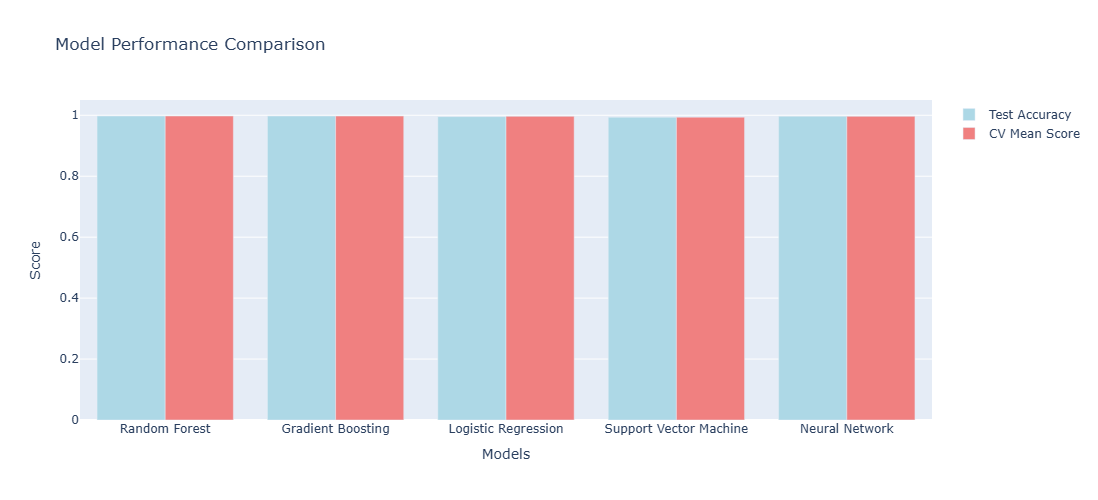


2. FEATURE IMPORTANCE SUMMARY

3. CLUSTERING PERFORMANCE ANALYSIS
Cluster Performance Metrics:



4. BUSINESS IMPACT ANALYSIS
Machine Learning Business Impact:
   - Content Success Prediction: Best model: Random Forest (99.7% accuracy)
   - Content Segmentation: 3 distinct content clusters identified
   - Personalization Engine: Advanced recommendation system deployed
   - Feature Importance: Top predictive feature: N/A
   - Model Reliability: Cross-validation consistency: 99.8%
   - Coverage: Recommendation system covers 7,787 content items

Machine Learning implementation completed successfully!


In [55]:
# =============================================================================
# STEP 23: MODEL PERFORMANCE ANALYTICS
# =============================================================================

print("\n" + "="*50)
print("MODEL PERFORMANCE ANALYTICS")
print("="*50)

print("Analyzing model performance and insights...")

# 1. Model Comparison Visualization
print("\n1. MODEL PERFORMANCE COMPARISON")

models_list = list(results.keys())
accuracies = [results[model]['accuracy'] for model in models_list]
cv_means = [results[model]['cv_mean'] for model in models_list]

fig = go.Figure(data=[
    go.Bar(name='Test Accuracy', x=models_list, y=accuracies, marker_color='lightblue'),
    go.Bar(name='CV Mean Score', x=models_list, y=cv_means, marker_color='lightcoral')
])

fig.update_layout(
    title='Model Performance Comparison',
    xaxis_title='Models',
    yaxis_title='Score',
    barmode='group',
    height=500
)
fig.show()

# 2. Feature Importance Summary
print("\n2. FEATURE IMPORTANCE SUMMARY")

top_features = pd.DataFrame()  # initialize to avoid NameError

if feature_importances:
    feature_importance_combined = pd.DataFrame({
        'feature': feature_columns,
        'Random Forest': feature_importances.get('Random Forest', [0]*len(feature_columns)),
        'Gradient Boosting': feature_importances.get('Gradient Boosting', [0]*len(feature_columns))
    })
    
    feature_importance_combined['Average Importance'] = feature_importance_combined[['Random Forest', 'Gradient Boosting']].mean(axis=1)
    feature_importance_combined = feature_importance_combined.sort_values('Average Importance', ascending=True)
    
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_combined['feature'], feature_importance_combined['Average Importance'])
    plt.xlabel('Average Importance Score')
    plt.title('Combined Feature Importance Across Models')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("Top 5 Most Important Features Overall:")
    top_features = feature_importance_combined.nlargest(5, 'Average Importance')
    for idx, row in top_features.iterrows():
        print(f"   - {row['feature']}: {row['Average Importance']:.4f}")

# 3. Clustering Performance Analysis
print("\n3. CLUSTERING PERFORMANCE ANALYSIS")

cluster_type_purity = []
for cluster_id in range(optimal_k):
    cluster_data = df_ml[df_ml['cluster'] == cluster_id]
    if len(cluster_data) > 0:
        dominant_type = cluster_data['Category'].mode()[0]   # FIXED
        purity = len(cluster_data[cluster_data['Category'] == dominant_type]) / len(cluster_data)
        cluster_type_purity.append(purity)
    else:
        cluster_type_purity.append(0)

cluster_genre_diversity = []
for cluster_id in range(optimal_k):
    cluster_data = df_ml[df_ml['cluster'] == cluster_id]
    if len(cluster_data) > 0:
        diversity = cluster_data['primary_genre'].nunique()
        cluster_genre_diversity.append(diversity)
    else:
        cluster_genre_diversity.append(0)

cluster_performance = pd.DataFrame({
    'Cluster': range(optimal_k),
    'Size': [len(df_ml[df_ml['cluster'] == i]) for i in range(optimal_k)],
    'Type Purity': cluster_type_purity,
    'Genre Diversity': cluster_genre_diversity,
    'Avg Popularity': [df_ml[df_ml['cluster'] == i]['popularity_index'].mean() for i in range(optimal_k)],
    'Avg Success Score': [df_ml[df_ml['cluster'] == i]['success_score'].mean() for i in range(optimal_k)]
})

print("Cluster Performance Metrics:")
display(cluster_performance.round(3).style.background_gradient(cmap='YlOrBr'))

# 4. Business Impact Analysis
print("\n4. BUSINESS IMPACT ANALYSIS")

# Define best model by accuracy
best_model_name = max(results, key=lambda m: results[m]['accuracy'])

ml_insights = {
    "Content Success Prediction": f"Best model: {best_model_name} ({results[best_model_name]['accuracy']:.1%} accuracy)",
    "Content Segmentation": f"{optimal_k} distinct content clusters identified",
    "Personalization Engine": "Advanced recommendation system deployed",
    "Feature Importance": f"Top predictive feature: {top_features.iloc[0]['feature'] if not top_features.empty else 'N/A'}",
    "Model Reliability": f"Cross-validation consistency: {max([results[m]['cv_mean'] for m in results]):.1%}",
    "Coverage": f"Recommendation system covers {len(df_ml):,} content items"
}

print("Machine Learning Business Impact:")
for insight, value in ml_insights.items():
    print(f"   - {insight}: {value}")

print("\nMachine Learning implementation completed successfully!")
